**Task**  

- Create a notebook called assignment03-pie.ipynb  
The note book should have a nice pie chart of peoples email domains in the csv file at the url  https://drive.google.com/uc?id=1AWPf-pJodJKeHsARQK_RHiNsE8fjPCVK&export=download  
This csv file has 1000 people. You may download the data or link to it.  

### Author: David Scally

In [34]:
## Import Library
## Data frames. Allows us to easily read in a csv file, can read directly from the internet.
import pandas as pd

## Plotting
import matplotlib.pyplot as plt

In [35]:
url = 'https://drive.google.com/uc?id=1AWPf-pJodJKeHsARQK_RHiNsE8fjPCVK&export=download'
df = pd.read_csv(url)       #Read in url link for csv data
df.head()                   # Look at first 5 rows as check

,Index,User Id,First Name,Last Name,Sex,Email,Phone,Date of birth,Job Title
0,1,8717bbf45cCDbEe,Shelia,Mahoney,Male,pwarner@example.org,857.139.8239,2014-01-27,Probation officer
1,2,3d5AD30A4cD38ed,Jo,Rivers,Female,fergusonkatherine@example.net,+1-950-759-8687,1931-07-26,Dancer
2,3,810Ce0F276Badec,Sheryl,Lowery,Female,fhoward@example.org,(599)782-0605,2013-11-25,Copy
3,4,BF2a889C00f0cE1,Whitney,Hooper,Male,zjohnston@example.com,+1-939-130-6258,2012-11-17,Counselling psychologist
4,5,9afFEafAe1CBBB9,Lindsey,Rice,Female,elin@example.net,(390)417-1635x3010,1923-04-15,Biomedical engineer


In [36]:
# Amend df to split out the em-mail domain - lecture notes
 # https://atlantictu-my.sharepoint.com/personal/andrew_beatty_atu_ie/_layouts/15/stream.aspx?id=%2Fpersonal%2Fandrew%5Fbeatty%5Fatu%5Fie%2FDocuments%2FPFDA%20private%202025%2Fvideos%2FPFDA3%2E3%20Tutorial%20manipulating%2Emp4&ga=1&referrer=StreamWebApp%2EWeb&referrerScenario=AddressBarCopied%2Eview%2Ee447f536%2D39e7%2D46aa%2Dbe12%2D1556adbcfa59
df['domain'] = df['Email'].str.split('@').str[1]
df.head() # check successful

,Index,User Id,First Name,Last Name,Sex,Email,Phone,Date of birth,Job Title,domain
0,1,8717bbf45cCDbEe,Shelia,Mahoney,Male,pwarner@example.org,857.139.8239,2014-01-27,Probation officer,example.org
1,2,3d5AD30A4cD38ed,Jo,Rivers,Female,fergusonkatherine@example.net,+1-950-759-8687,1931-07-26,Dancer,example.net
2,3,810Ce0F276Badec,Sheryl,Lowery,Female,fhoward@example.org,(599)782-0605,2013-11-25,Copy,example.org
3,4,BF2a889C00f0cE1,Whitney,Hooper,Male,zjohnston@example.com,+1-939-130-6258,2012-11-17,Counselling psychologist,example.com
4,5,9afFEafAe1CBBB9,Lindsey,Rice,Female,elin@example.net,(390)417-1635x3010,1923-04-15,Biomedical engineer,example.net


In [37]:
# Count number of times a certain domain appears in dataset - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.value_counts.html
 # 
domain_number = df['domain'].value_counts()
domain_number # check numbers


domain
example.org    341
example.com    339
example.net    320
Name: count, dtype: int64

**Explanation of code**

The function make_autopct was adapted from Stack Overflow (https://stackoverflow.com/questions/6170246/how-do-i-display-both-the-percentage-and-absolute-value-on-a-matplotlib-pie-chart

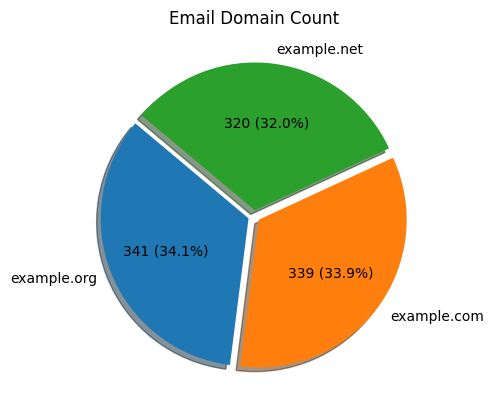

In [ ]:
# Custom function to show both count and percentage on pie chart
# Source: Stack Overflow, "How do I display both the percentage and absolute value on a matplotlib pie chart?"
# URL: https://stackoverflow.com/questions/6170246/how-do-i-display-both-the-percentage-and-absolute-value-on-a-matplotlib-pie-chart


def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        count = int(round(pct*total/100.0))
        return f"{count} ({pct:.1f}%)"
    return my_autopct

# Plot pie chart
# URL: https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html

plt.pie(domain_number,labels=domain_number.index, autopct=make_autopct(domain_number), startangle=140, shadow=True, explode=[0.04]*len(domain_number))
plt.title('Email Domain Count')
plt.show()
